In [2]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from urllib.request import urlopen
from urllib.parse import quote_plus
from bs4 import BeautifulSoup
import time 
from konlpy.tag import Okt
import pandas as pd
import re
from tqdm import trange, notebook

# 에브리타임 "코로나" 키워드 

response = requests.get(url, headers={"User-Agent": "Mozilla/5.0"})

# 셀레니움 에브리타임 웹크롤링

In [335]:
#baseUrl = "https://everytime.kr/377398/p/3253"
#plusUrl = input("검색할 태그를 입력하세요 : ")

#url = baseUrl + quote_plus(plusUrl)

url = "https://everytime.kr/377399/p/1"

driver = webdriver.Chrome("../docs/chromedriver_win32/chromedriver")
driver.get('https://everytime.kr/login')

#크롤링 할 홈페이지 가져오기
driver.find_element_by_name("userid").send_keys("minzilov")
#태그의 네임이 userid 인 element 가져오고 "내 아이디" 입력

driver.find_element_by_name("password").send_keys("rnrmf35")
#태그의 네임이 password 인 element 가져오고 "비밀번호" 입력

driver.find_element_by_tag_name("input").send_keys(Keys.RETURN)
#로그인 버튼 찾고 클릭

# 로그인 완료

driver.get(url) # 로그인 후 인문게시판에서 코로나 검색어 1페이지 이동

time.sleep(3)
    
html = driver.page_source
soup = BeautifulSoup(html)


everyTime=[]

driver.find_element_by_xpath('//*[@id="sheet"]/ul/li[3]/a').click()

for page_roof in notebook.tqdm(range(0,1845,2)):
    res = driver.page_source
    soup = BeautifulSoup(res,"html.parser")
    header = soup.select('#container > div.wrap.articles > article > a > h2')
    vote = soup.select('.vote')
    comment = soup.select('.comment')
    text = soup.select('#container > div.wrap.articles > article > a > p')
    date = soup.select('#container > div.wrap.articles > article > a > time')
    driver.find_element_by_css_selector('#container > div.wrap.articles > div.pagination > a.next').click()
    time.sleep(0.8)

    for vote,comment,date,header,text in zip(vote,comment,date,header,text):
         everyTime.append([int(vote.get_text()),int(comment.get_text()),date.get_text(),header.get_text(), text.get_text()])
        
driver.close()

In [336]:
everyTime

[[0, 0, '12분 전', '오류수정좀해주세요', '오류뜨는데 뭐가잘못된건가요?'],
 [0, 3, '22분 전', '현기윤 문성찬', '시험 언제보는지 알려줌?'],
 [0, 3, '29분 전', 'R. I. P', '“Diego Maradona”'],
 [0, 9, '32분 전', '만약에 1000억이 그냥 생기면', '학교 자퇴할거임?'],
 [0,
  0,
  '40분 전',
  'ㅈㅅㅎ 도움...',
  '23080 도와주세요ㅜ https://open.kakao.com/o/sXe1ilHc'],
 [0, 5, '43분 전', '헤헤', '고마웡'],
 [0, 0, '52분 전', '23080', 'iterator class도 만들어야하나요?'],
 [0, 13, '11/26 01:27', '근데 비대면인데 캠키라는 소리없으면', '오픈북이라는얘기겠지..?'],
 [0, 2, '11/26 01:24', '영회 인터뷰 하신 분 계신가요', '이거 보고 읽어도 되나요....'],
 [0, 3, '11/26 01:22', '21학번은 몇년도 생이냐?', '왤케 나이 먹었지...'],
 [0, 8, '11/26 01:20', '물리학 이게 맞냐?', '존나 어렵네 23장 24장...'],
 [0,
  0,
  '11/26 01:14',
  'ㅇㅊㄱ 교수님 팀프 듣는분중에',
  '자체평가표가 어떤건지 아시나요..? 보고서 밑에있는 팀원평가인지 표에 있는 자체평가표인지 모르겠네요'],
 [0, 2, '11/26 01:00', '정통 linc 트랙터 말이야', '하고싶은데 내년에 휴학할 예정이야 어떻게 하면 좋을까..'],
 [1, 4, '11/26 00:57', '지금', '이순간'],
 [0,
  5,
  '11/26 00:56',
  '애들아 계절학기 개념좀 정확히 알고싶은데..',
  '이번에 1학기때 성적 안좋았던거 겨울방학 계절학기에 성적 복구할 수 있는 그런 개념인거야 계절학기가? 만약에 1학기때랑 계절학기 개설된거랑 과목'],
 [0,
  3,
 

In [337]:
et1 = pd.DataFrame(everyTime)
et1.to_csv('../data/코로나이후명지용인_전체.csv')

In [338]:
df1 = pd.read_csv("../data/코로나이후명지서울_전체.csv")
df2 = pd.read_csv("../data/코로나이후명지용인_전체.csv")

In [339]:
df1

,Unnamed: 0,0,1,2,3,4
0,0,0,5,5분 전,밑에 애가,문장끝말잇기 안해줌 해줄사람..
1,1,0,54,13분 전,끝말잇기할사람,끝장단어말고 어려운단어쓰지말고
2,2,0,7,20분 전,뮤지컬본다하면,홍광호 vs 조승우
3,3,0,0,26분 전,글경전 이정환교수님,개인프로젝트 기업뭘로해야되나..ㅜ
4,4,0,0,29분 전,유라시아 ㅊㅁㅇ교수님,유라시아 ㅊㅁㅇ 교수님 13주차 과제 기말고사 예상문제 몇개 내야해요??
...,...,...,...,...,...,...
31995,31995,0,15,06/25 18:01,남자는 군대갔다왔다 쳐도,여자가 나이 많으면 어떻게 생각해?
31996,31996,0,8,06/25 17:56,1학년 방학,뭘 해야 의미있게 시간을 보낼 수 있을까요...?
31997,31997,0,0,06/25 17:50,유엔난민기구 한국대표부 모금 캠페이너,해본사람?
31998,31998,0,9,06/25 17:49,안끝난애들 과제 몇개 남음?,나 2갠데 하필 제일 빡센 2개라서 살기싫다


In [340]:
df2

,Unnamed: 0,0,1,2,3,4
0,0,0,0,12분 전,오류수정좀해주세요,오류뜨는데 뭐가잘못된건가요?
1,1,0,3,22분 전,현기윤 문성찬,시험 언제보는지 알려줌?
2,2,0,3,29분 전,R. I. P,“Diego Maradona”
3,3,0,9,32분 전,만약에 1000억이 그냥 생기면,학교 자퇴할거임?
4,4,0,0,40분 전,ㅈㅅㅎ 도움...,23080 도와주세요ㅜ https://open.kakao.com/o/sXe1ilHc
...,...,...,...,...,...,...
18455,18455,0,1,06/16 17:52,함박관 출구 어디야 알려주세요...,맴맴 돌고 있어요... ㅋㅋ
18456,18456,0,1,06/16 17:48,함박관 차세대나 창조예술관 근처인가용?,아아ㅠㅠ
18457,18457,0,0,06/16 17:45,늦겠누,빨간버스인데 지금 쌍용아파트네...하
18458,18458,0,0,06/16 17:44,ㅈㄱㄴ,kcu성적확인 어캐하나요?


In [341]:
df3 = pd.concat([df1,df2],axis=0)

In [342]:
df3

,Unnamed: 0,0,1,2,3,4
0,0,0,5,5분 전,밑에 애가,문장끝말잇기 안해줌 해줄사람..
1,1,0,54,13분 전,끝말잇기할사람,끝장단어말고 어려운단어쓰지말고
2,2,0,7,20분 전,뮤지컬본다하면,홍광호 vs 조승우
3,3,0,0,26분 전,글경전 이정환교수님,개인프로젝트 기업뭘로해야되나..ㅜ
4,4,0,0,29분 전,유라시아 ㅊㅁㅇ교수님,유라시아 ㅊㅁㅇ 교수님 13주차 과제 기말고사 예상문제 몇개 내야해요??
...,...,...,...,...,...,...
18455,18455,0,1,06/16 17:52,함박관 출구 어디야 알려주세요...,맴맴 돌고 있어요... ㅋㅋ
18456,18456,0,1,06/16 17:48,함박관 차세대나 창조예술관 근처인가용?,아아ㅠㅠ
18457,18457,0,0,06/16 17:45,늦겠누,빨간버스인데 지금 쌍용아파트네...하
18458,18458,0,0,06/16 17:44,ㅈㄱㄴ,kcu성적확인 어캐하나요?


In [343]:
del df3['Unnamed: 0']

In [344]:
df3

,0,1,2,3,4
0,0,5,5분 전,밑에 애가,문장끝말잇기 안해줌 해줄사람..
1,0,54,13분 전,끝말잇기할사람,끝장단어말고 어려운단어쓰지말고
2,0,7,20분 전,뮤지컬본다하면,홍광호 vs 조승우
3,0,0,26분 전,글경전 이정환교수님,개인프로젝트 기업뭘로해야되나..ㅜ
4,0,0,29분 전,유라시아 ㅊㅁㅇ교수님,유라시아 ㅊㅁㅇ 교수님 13주차 과제 기말고사 예상문제 몇개 내야해요??
...,...,...,...,...,...
18455,0,1,06/16 17:52,함박관 출구 어디야 알려주세요...,맴맴 돌고 있어요... ㅋㅋ
18456,0,1,06/16 17:48,함박관 차세대나 창조예술관 근처인가용?,아아ㅠㅠ
18457,0,0,06/16 17:45,늦겠누,빨간버스인데 지금 쌍용아파트네...하
18458,0,0,06/16 17:44,ㅈㄱㄴ,kcu성적확인 어캐하나요?


In [345]:
df3.columns=['vote','data','comment','title','content']

In [346]:
df3.to_csv("../data/코로나이후명지_final.csv")

In [305]:
seoul = pd.read_csv("../data/코로나이전명지_final.csv")
seoul

,Unnamed: 0,vote,data,comment,title,content
0,0,0,2,01/01 01:10,반오십이여!,일어나라!!
1,1,0,0,01/01 01:03,모두 해피 뉴 이어!!!,새해 복 많이 받아랑
2,2,15,3,01/01 00:38,다들 새해 복 많이 받아요,♥️🙏🏻
3,3,0,6,01/01 00:31,예체능 쪽으로 톱 찍은 사람이 그 머리+노력으로 공부도 잘할까?,어제 우리 형이랑 논쟁함. 나는 양자가 아예 다른 영역이라 예술에서 톱 찍어도 공부...
4,4,0,2,01/01 00:31,짧고 굵은 새해 인사말 추천좀,"해피뉴이어, 새해 복 많이 받으세요 말고"
...,...,...,...,...,...,...
33095,15755,0,3,19/06/13 15:53,명지대에서 용터까지 무료면,용터에서 명지대까지도 무료죠?
33096,15756,0,3,19/06/13 15:49,"지갑주워서 글올렸는데 주인이안나타나요,,","어디로 보내야할까요 과사,,?"
33097,15757,0,3,19/06/13 15:32,공학특론 수업은 있음. 성적엔 안들감,끝
33098,15758,0,8,19/06/13 15:31,면접 경쟁률 4:1,응시자 평균연령 30대 중반 나 20대중반 가능성있어보이냐?


In [121]:
del seoul['Unnamed: 0']

In [122]:
seoul.columns=['recommend','comment','date','title','content']

In [123]:
seoul

,recommend,comment,date,title,content
0,18,8,01/24 23:07,코로나 바이러스 우한 폐렴 있잖아,우리학교 중국인 엄청 많은데 나만 걱정돼 ㄷㄷㄷㄷ ㅠㅠ
1,0,5,01/26 10:00,코로나때문에,알바하는데 손님없다 ㅋㅋㅋㅋㅋㅋ
2,0,6,01/26 10:27,코로나 예방수칙,감염루트가 비말감염 인지라 마스크만 잘 쓰고 손만 잘 씻으면 예방하는게 그다지 어렵...
3,2,1,01/26 15:26,충남도 여행사 관광객에 양해 구하고 취소요청,홍성 연합뉴스 양영석 기자 우한 폐렴 으로 불리는 신종 코로나바이러스 확산...
4,0,9,01/27 10:37,코로나 때문에 글올립니다,혹시 중국인 유학생 계속 받을려나 이번에 기숙사 들어가는데 이러면 솔직히 걱정이 ...
...,...,...,...,...,...
1952,0,1,11/25 17:36,대면시험 개로 이동할뻔했는데 됨,케텍타고 가는길에 코로나 걸릴까봐 모자라도 살라했드만 다 비대면때리네 모든 시험...
1953,0,8,11/25 18:05,코로나때문에 비대면 시험 보는건데,과제를 학교에 와서 내고 가라고 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 엄청나...
1954,0,8,11/25 19:07,마스크 의무화 아닌가,어르신들 너무 대놓고 안쓰고 당당하게 다니셔서 코로나 끝난 줄
1955,3,5,18/11/26 20:06,개월 치즈냥이 주인구해요,개월 치즈냥이의 주인을 찾아요 자캠 자취러 혹은 용인에 사시는 분들 중에 고양...


In [306]:
seoul['title'] = seoul['title'].str.replace("[^ㄱ-하-ㅣ가-힣]"," ") # 한글이 아니면 전부 제거
seoul['content'] = seoul['content'].str.replace("[^ㄱ-하-ㅣ가-힣]"," ") # 한글이 아니면 전부 제거

In [307]:
seoul

,Unnamed: 0,vote,data,comment,title,content
0,0,0,2,01/01 01:10,반오십이여,일어나라
1,1,0,0,01/01 01:03,모두 해피 뉴 이어,새해 복 많이 받아랑
2,2,15,3,01/01 00:38,다들 새해 복 많이 받아요,
3,3,0,6,01/01 00:31,예체능 쪽으로 톱 찍은 사람이 그 머리 노력으로 공부도 잘할까,어제 우리 형이랑 논쟁함 나는 양자가 아예 다른 영역이라 예술에서 톱 찍어도 공부...
4,4,0,2,01/01 00:31,짧고 굵은 새해 인사말 추천좀,해피뉴이어 새해 복 많이 받으세요 말고
...,...,...,...,...,...,...
33095,15755,0,3,19/06/13 15:53,명지대에서 용터까지 무료면,용터에서 명지대까지도 무료죠
33096,15756,0,3,19/06/13 15:49,지갑주워서 글올렸는데 주인이안나타나요,어디로 보내야할까요 과사
33097,15757,0,3,19/06/13 15:32,공학특론 수업은 있음 성적엔 안들감,끝
33098,15758,0,8,19/06/13 15:31,면접 경쟁률,응시자 평균연령 대 중반 나 대중반 가능성있어보이냐


# 워드클라우드

In [308]:
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt
import numpy as np

okt = Okt()
train_data = seoul
train_data[:30] # 상위 5개 출력

,Unnamed: 0,vote,data,comment,title,content
0,0,0,2,01/01 01:10,반오십이여,일어나라
1,1,0,0,01/01 01:03,모두 해피 뉴 이어,새해 복 많이 받아랑
2,2,15,3,01/01 00:38,다들 새해 복 많이 받아요,
3,3,0,6,01/01 00:31,예체능 쪽으로 톱 찍은 사람이 그 머리 노력으로 공부도 잘할까,어제 우리 형이랑 논쟁함 나는 양자가 아예 다른 영역이라 예술에서 톱 찍어도 공부...
4,4,0,2,01/01 00:31,짧고 굵은 새해 인사말 추천좀,해피뉴이어 새해 복 많이 받으세요 말고
5,5,1,3,01/01 00:18,아하 그래서 카톡안왓구나,그럼 그러치
6,6,0,0,01/01 00:17,전과할 예정이면,이번에 학점잘받앗어도 장학금신청못하죠 각 과별로 장학금주는거니까
7,7,0,0,01/01 00:16,초딩때 년은 타임캡슐에 써놨었는데,벌써 대 후반이네 후 ㅠㅋㅋㅋ
8,8,0,1,01/01 00:15,카톡 터졌네,안 보내짐 ㅋㅋ
9,9,0,5,01/01 00:10,아나 학번인데 화석이냐이제,아직은 아니겠지


In [309]:
train_data['content'].isnull().sum()

0

In [310]:
train_data = train_data.dropna()

In [311]:
word_list = []

for i in train_data.title:
    word_list.append(i)
for i in train_data.content:
    word_list.append(i)

# 형태소 분리

In [312]:
sentences_tag = []

for sentence in word_list:
    morph = okt.pos(sentence)
    sentences_tag.append(morph)

In [313]:
sentences_tag

[[('반', 'Modifier'), ('오십', 'Noun'), ('이여', 'Josa')],
 [('모두', 'Noun'), ('해피', 'Noun'), ('뉴', 'Noun'), ('이어', 'Verb')],
 [('다', 'Adverb'),
  ('들', 'Verb'),
  ('새해', 'Noun'),
  ('복', 'Noun'),
  ('많이', 'Adverb'),
  ('받아요', 'Verb')],
 [('예체능', 'Noun'),
  ('쪽', 'Noun'),
  ('으로', 'Josa'),
  ('톱', 'Noun'),
  ('찍은', 'Verb'),
  ('사람', 'Noun'),
  ('이', 'Josa'),
  ('그', 'Noun'),
  ('머리', 'Noun'),
  ('노력', 'Noun'),
  ('으로', 'Josa'),
  ('공부', 'Noun'),
  ('도', 'Josa'),
  ('잘', 'VerbPrefix'),
  ('할까', 'Verb')],
 [('짧고', 'Adjective'),
  ('굵은', 'Adjective'),
  ('새해', 'Noun'),
  ('인사말', 'Noun'),
  ('추천', 'Noun'),
  ('좀', 'Noun')],
 [('아하', 'Noun'),
  ('그래서', 'Adverb'),
  ('카톡', 'Noun'),
  ('안왓', 'Noun'),
  ('구나', 'Noun')],
 [('전과', 'Noun'), ('할', 'Verb'), ('예정', 'Noun'), ('이면', 'Noun')],
 [('초딩', 'Noun'),
  ('때', 'Noun'),
  ('년', 'Noun'),
  ('은', 'Josa'),
  ('타임캡슐', 'Noun'),
  ('에', 'Josa'),
  ('써놨었는데', 'Verb')],
 [('카톡', 'Noun'), ('터졌네', 'Verb')],
 [('아', 'Noun'),
  ('나', 'Josa'),
  ('학번', 'Noun'),
  

In [314]:
# 명사, 동사, 형용사 사용

noun_list = []
for sentence in sentences_tag:
    for word, tag in sentence:
        if tag in ["Noun"]:
            noun_list.append(word)

In [315]:
len(noun_list)

noun_list = [n for n in noun_list if len(n) > 1]
noun_list[:]

['오십',
 '모두',
 '해피',
 '새해',
 '예체능',
 '사람',
 '머리',
 '노력',
 '공부',
 '새해',
 '인사말',
 '추천',
 '아하',
 '카톡',
 '안왓',
 '구나',
 '전과',
 '예정',
 '이면',
 '초딩',
 '타임캡슐',
 '카톡',
 '학번',
 '화석',
 '이제',
 '해피뉴이어',
 '교양과목',
 '써보쟈',
 '제대로',
 '카투사',
 '제야',
 '종소리',
 '한웅',
 '소행',
 '진짜',
 '융소',
 '인식',
 '손가락',
 '몇번',
 '까딱',
 '새해인사',
 '이제',
 '군대',
 '가야',
 '핸드폰',
 '취미',
 '해동',
 '고생',
 '교내',
 '사건',
 '사고',
 '부모님',
 '진짜',
 '씨발',
 '웅희형',
 '소행',
 '시간',
 '반도',
 '경영',
 '문정',
 '복전',
 '계절',
 '학기',
 '인강',
 '이재성',
 '교수',
 '이의신청',
 '사람',
 '누가',
 '대학생',
 '사채',
 '블랙',
 '헤드',
 '전과',
 '여자',
 '누구',
 '국장',
 '캡슐',
 '커피',
 '머신',
 '사람',
 '학년',
 '학기',
 '학년',
 '장학금',
 '방금',
 '법학과',
 '수준',
 '글삭',
 '친구',
 '보라',
 '인턴',
 '합격',
 '학점',
 '공기업',
 '간다',
 '친구',
 '농협',
 '신용카드',
 '보신',
 '여자배구',
 '명지대',
 '수능',
 '경쟁률',
 '학기',
 '석차',
 '대해',
 '성적',
 '확정',
 '언제',
 '현중',
 '중간',
 '범위',
 '어디',
 '방학',
 '기숙사',
 '학점',
 '어디',
 '처음',
 '성적',
 '기숙사',
 '여자',
 '연간',
 '학년',
 '진선',
 '회복',
 '지연',
 '전공',
 '전공',
 '학점',
 '이종훈',
 '교수',
 '유라시아',
 '공무원',
 '학원',
 '김상민',
 '교수',
 '

In [17]:
from collections import Counter
from wordcloud import WordCloud

In [319]:
counts = Counter(noun_list)
tags = counts.most_common(200)
tags

[('교수', 4527),
 ('사람', 2994),
 ('시험', 2275),
 ('수업', 2107),
 ('학교', 1933),
 ('오늘', 1732),
 ('학기', 1508),
 ('진짜', 1252),
 ('성적', 1116),
 ('학점', 1089),
 ('시간', 1066),
 ('언제', 1000),
 ('공부', 999),
 ('과제', 991),
 ('영어', 901),
 ('지금', 852),
 ('이번', 849),
 ('혹시', 807),
 ('신청', 805),
 ('어디', 758),
 ('하나', 758),
 ('계절', 696),
 ('그냥', 692),
 ('추천', 691),
 ('학년', 689),
 ('문제', 689),
 ('생각', 677),
 ('채플', 660),
 ('우리', 646),
 ('내일', 635),
 ('가요', 634),
 ('쪽지', 630),
 ('점수', 617),
 ('정도', 611),
 ('명지대', 604),
 ('강의', 601),
 ('전공', 579),
 ('신분', 576),
 ('친구', 553),
 ('아시', 538),
 ('여자', 536),
 ('제발', 525),
 ('남자', 520),
 ('이해', 496),
 ('중간', 488),
 ('인강', 486),
 ('질문', 473),
 ('과목', 470),
 ('건가', 460),
 ('장학금', 455),
 ('도서관', 455),
 ('결석', 442),
 ('교양', 424),
 ('기간', 421),
 ('족보', 412),
 ('범위', 410),
 ('기숙사', 408),
 ('휴강', 386),
 ('졸업', 384),
 ('토익', 384),
 ('출석', 382),
 ('학생', 377),
 ('존나', 373),
 ('하나요', 371),
 ('동아리', 364),
 ('보고', 358),
 ('한번', 346),
 ('긱사', 342),
 ('자캠', 337),
 ('가능', 334),
 (

In [320]:
counts

Counter({'오십': 1,
         '모두': 86,
         '해피': 9,
         '새해': 5,
         '예체능': 96,
         '사람': 2994,
         '머리': 170,
         '노력': 42,
         '공부': 999,
         '인사말': 1,
         '추천': 691,
         '아하': 1,
         '카톡': 72,
         '안왓': 1,
         '구나': 6,
         '전과': 282,
         '예정': 77,
         '이면': 182,
         '초딩': 22,
         '타임캡슐': 1,
         '학번': 145,
         '화석': 27,
         '이제': 308,
         '해피뉴이어': 2,
         '교양과목': 16,
         '써보쟈': 1,
         '제대로': 81,
         '카투사': 3,
         '제야': 12,
         '종소리': 1,
         '한웅': 23,
         '소행': 4,
         '진짜': 1252,
         '융소': 79,
         '인식': 37,
         '손가락': 9,
         '몇번': 108,
         '까딱': 2,
         '새해인사': 1,
         '군대': 209,
         '가야': 142,
         '핸드폰': 65,
         '취미': 26,
         '해동': 1,
         '고생': 45,
         '교내': 57,
         '사건': 131,
         '사고': 75,
         '부모님': 80,
         '씨발': 144,
         '웅희형': 1,
         '시간':

# 불필요한 단어 삭제

In [137]:
# 69 비대

In [68]:
tags = dict(tags)

In [69]:
tags.pop('비대')
tags['비대면']=69

In [70]:
tags.pop('코로나')
tags.pop('지금')
tags.pop('진짜')
tags.pop('입니다')
tags.pop('학생')
tags.pop('생각')
tags.pop('이번')
tags.pop('진자')
tags.pop('해서')
tags.pop('관련')
tags.pop('하면')
tags.pop('그냥')
tags.pop('하는데')
tags.pop('안녕하세요')
tags.pop('했는데')
tags.pop('여러분')
tags.pop('보고')
tags.pop('어떻게')
tags.pop('공지')
tags.pop('진행')
tags.pop('하고')
tags.pop('있는')
tags.pop('있는데')
tags.pop('안내')
tags.pop('솔직히')
tags.pop('오늘')
tags.pop('안녕하십니까')
tags.pop('다시')
tags.pop('해야')
tags.pop('원래')
tags.pop('계속')
tags.pop('이제')
tags.pop('아님')
tags.pop('다른')
tags.pop('같은데')

KeyError: '하는'

In [138]:
tags

[('코로나', 1779),
 ('학교', 442),
 ('장학금', 433),
 ('대면', 286),
 ('학기', 272),
 ('시험', 260),
 ('때문', 256),
 ('사람', 227),
 ('성적', 192),
 ('진짜', 154),
 ('지금', 149),
 ('생각', 144),
 ('학생', 134),
 ('우리', 130),
 ('명지대', 127),
 ('이번', 126),
 ('진자', 123),
 ('비대', 116),
 ('등록금', 112),
 ('교수', 99),
 ('강의', 95),
 ('휴학', 93),
 ('관련', 90),
 ('수업', 86),
 ('개강', 85),
 ('친구', 84),
 ('대학', 77),
 ('학우', 72),
 ('알바', 70),
 ('그냥', 70),
 ('시간', 70),
 ('과제', 65),
 ('학년', 64),
 ('마스크', 61),
 ('공지', 61),
 ('보고', 61),
 ('원래', 56),
 ('명대', 55),
 ('진행', 55),
 ('여러분', 55),
 ('공부', 52),
 ('계속', 51),
 ('안내', 47),
 ('감염', 47),
 ('혹시', 46),
 ('학점', 46),
 ('만원', 45),
 ('상황', 45),
 ('연기', 44),
 ('정도', 44),
 ('동아리', 44),
 ('다시', 44),
 ('이제', 44),
 ('지급', 43),
 ('온라인', 42),
 ('인강', 41),
 ('특별', 41),
 ('언제', 40),
 ('문제', 40),
 ('신문', 40),
 ('요즘', 40),
 ('다른', 40),
 ('오늘', 39),
 ('졸업', 39),
 ('사태', 38),
 ('봉사', 38),
 ('이유', 37),
 ('인문', 37),
 ('안녕하십니까', 37),
 ('현재', 37),
 ('만약', 35),
 ('올해', 35),
 ('캠퍼스', 35),
 ('건가', 35),
 ('하나

In [72]:
tags.pop('학기')
tags.pop('학년')
tags.pop('명대')
tags.pop('건가')
tags.pop('혹시')
tags.pop('요즘')
tags.pop('지급')
tags.pop('아니')
tags.pop('현재')
tags.pop('만원')
tags.pop('정도')
tags.pop('그럼')
tags.pop('합니다')
tags.pop('하는거')
tags.pop('만약')
tags.pop('이유')

KeyError: '가고'

In [321]:
from urllib import request
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image

In [322]:
custom_mask = np.array(Image.open("C:/Users/Kim/Desktop/이력서.jpg"))

In [323]:
for i in range(len(custom_mask)):
    for j in range(len(custom_mask[i])):
        if custom_mask[i][j]==0:
            custom_mask[i][j] = 255

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

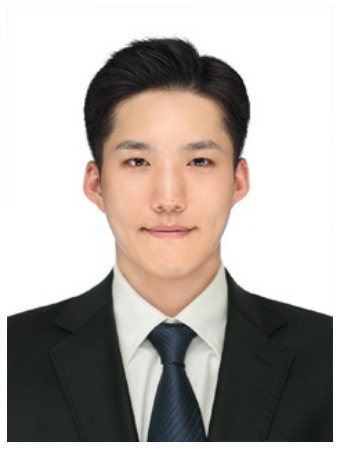

In [324]:
plt.figure(figsize=(8,8))
plt.imshow(custom_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

In [325]:
from wordcloud import ImageColorGenerator
image_colors = ImageColorGenerator(custom_mask) # 마스크용 사진의 색을 입력

# 인문캠 워드클라우드-포스트 코로나

In [326]:
from collections import Counter
from wordcloud import WordCloud

{'교수': 4527, '사람': 2994, '시험': 2275, '수업': 2107, '학교': 1933, '오늘': 1732, '학기': 1508, '진짜': 1252, '성적': 1116, '학점': 1089, '시간': 1066, '언제': 1000, '공부': 999, '과제': 991, '영어': 901, '지금': 852, '이번': 849, '혹시': 807, '신청': 805, '어디': 758, '하나': 758, '계절': 696, '그냥': 692, '추천': 691, '학년': 689, '문제': 689, '생각': 677, '채플': 660, '우리': 646, '내일': 635, '가요': 634, '쪽지': 630, '점수': 617, '정도': 611, '명지대': 604, '강의': 601, '전공': 579, '신분': 576, '친구': 553, '아시': 538, '여자': 536, '제발': 525, '남자': 520, '이해': 496, '중간': 488, '인강': 486, '질문': 473, '과목': 470, '건가': 460, '장학금': 455, '도서관': 455, '결석': 442, '교양': 424, '기간': 421, '족보': 412, '범위': 410, '기숙사': 408, '휴강': 386, '졸업': 384, '토익': 384, '출석': 382, '학생': 377, '존나': 373, '하나요': 371, '동아리': 364, '보고': 358, '한번': 346, '긱사': 342, '자캠': 337, '가능': 334, '휴학': 326, '근처': 326, '이제': 308, '인문': 306, '에타': 301, '인캠': 298, '취업': 294, '종강': 293, '중간고사': 292, '소리': 286, '전과': 282, '자기': 281, '새끼': 276, '다른': 275, '제출': 274, '확인': 270, '재수강': 270, '알바': 267, '만원': 258,

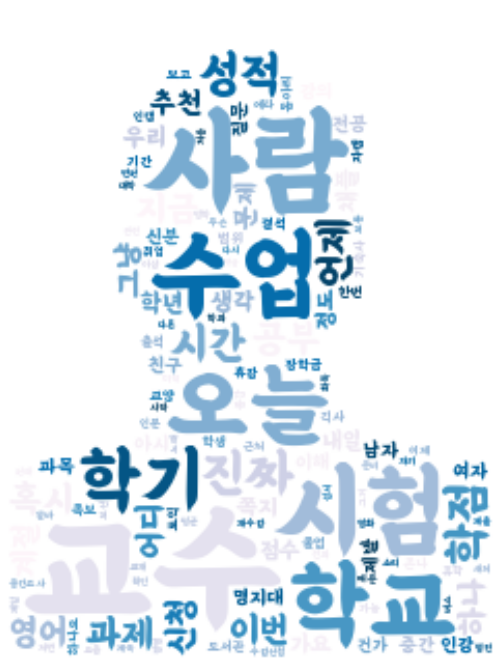

In [332]:
wordcloud = WordCloud(font_path="C:/Users/Kim/Downloads/BMEULJIROTTF.ttf",
                     background_color='white',width=800, height=600,
                     max_words=200, mask=custom_mask, # word의 최대 갯수와 마스크, font-size설정
                     max_font_size=70, colormap='PuBu')
print(dict(tags))

cloud = wordcloud.generate_from_frequencies(dict(tags))
plt.figure(figsize=(12,12))
plt.axis('off')
plt.imshow(cloud, interpolation='bilinear') # 마스크용 이미지의 색으로 워드클라우드 생성
plt.show()

# 용인캠 워드클라우드-포스트코로나

In [79]:
baseUrl = "https://everytime.kr/377399/all/"
plusUrl = input("검색할 태그를 입력하세요 : ")

url = baseUrl + quote_plus(plusUrl)

driver = webdriver.Chrome("../docs/chromedriver_win32/chromedriver")
driver.get('https://everytime.kr/login')

#크롤링 할 홈페이지 가져오기
driver.find_element_by_name("userid").send_keys("minzilov")
#태그의 네임이 userid 인 element 가져오고 "내 아이디" 입력

driver.find_element_by_name("password").send_keys("rnrmf35")
#태그의 네임이 password 인 element 가져오고 "비밀번호" 입력

driver.find_element_by_tag_name("input").send_keys(Keys.RETURN)
#로그인 버튼 찾고 클릭

# 로그인 완료

driver.get(url) # 로그인 후 인문게시판에서 코로나 검색어 1페이지 이동

time.sleep(3)
    
html = driver.page_source
soup = BeautifulSoup(html)


everyTime=[]

driver.find_element_by_xpath('//*[@id="sheet"]/ul/li[3]/a').click()

for page_roof in notebook.tqdm(range(34)):
    res = driver.page_source
    soup = BeautifulSoup(res,"html.parser")
    header = soup.select('#container > div.wrap.articles > article > a > h2')
    vote = soup.select('.vote')
    comment = soup.select('.comment')
    text = soup.select('#container > div.wrap.articles > article > a > p')
    date = soup.select('#container > div.wrap.articles > article > a > time')
    driver.find_element_by_css_selector('#container > div.wrap.articles > div.pagination > a.next').click()
    time.sleep(1)

    for vote,comment,date,header,text in zip(vote,comment,date,header,text):
         everyTime.append([int(vote.get_text()),int(comment.get_text()),date.get_text(),header.get_text(), text.get_text()])
        
driver.close()

검색할 태그를 입력하세요 : 코로나


C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\ProgramData\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [80]:
everytime_yongin = pd.DataFrame(everyTime)

In [82]:
everytime_yongin.to_csv('../data/everytime_yongin.csv')

In [3]:
yongin = pd.read_csv("../data/코로나이후명지_final.csv")

In [4]:
yongin

,Unnamed: 0,vote,data,comment,title,content
0,0,0,5,5분 전,밑에 애가,문장끝말잇기 안해줌 해줄사람..
1,1,0,54,13분 전,끝말잇기할사람,끝장단어말고 어려운단어쓰지말고
2,2,0,7,20분 전,뮤지컬본다하면,홍광호 vs 조승우
3,3,0,0,26분 전,글경전 이정환교수님,개인프로젝트 기업뭘로해야되나..ㅜ
4,4,0,0,29분 전,유라시아 ㅊㅁㅇ교수님,유라시아 ㅊㅁㅇ 교수님 13주차 과제 기말고사 예상문제 몇개 내야해요??
...,...,...,...,...,...,...
50455,18455,0,1,06/16 17:52,함박관 출구 어디야 알려주세요...,맴맴 돌고 있어요... ㅋㅋ
50456,18456,0,1,06/16 17:48,함박관 차세대나 창조예술관 근처인가용?,아아ㅠㅠ
50457,18457,0,0,06/16 17:45,늦겠누,빨간버스인데 지금 쌍용아파트네...하
50458,18458,0,0,06/16 17:44,ㅈㄱㄴ,kcu성적확인 어캐하나요?


In [5]:
del yongin["Unnamed: 0"]

In [6]:
yongin

,vote,data,comment,title,content
0,0,5,5분 전,밑에 애가,문장끝말잇기 안해줌 해줄사람..
1,0,54,13분 전,끝말잇기할사람,끝장단어말고 어려운단어쓰지말고
2,0,7,20분 전,뮤지컬본다하면,홍광호 vs 조승우
3,0,0,26분 전,글경전 이정환교수님,개인프로젝트 기업뭘로해야되나..ㅜ
4,0,0,29분 전,유라시아 ㅊㅁㅇ교수님,유라시아 ㅊㅁㅇ 교수님 13주차 과제 기말고사 예상문제 몇개 내야해요??
...,...,...,...,...,...
50455,0,1,06/16 17:52,함박관 출구 어디야 알려주세요...,맴맴 돌고 있어요... ㅋㅋ
50456,0,1,06/16 17:48,함박관 차세대나 창조예술관 근처인가용?,아아ㅠㅠ
50457,0,0,06/16 17:45,늦겠누,빨간버스인데 지금 쌍용아파트네...하
50458,0,0,06/16 17:44,ㅈㄱㄴ,kcu성적확인 어캐하나요?


In [7]:
yongin.columns=['recommend','comment','date','title','content']

In [8]:
yongin['title'] = yongin['title'].str.replace("[^ㄱ-하-ㅣ가-힣]"," ") # 한글이 아니면 전부 제거
yongin['content'] = yongin['content'].str.replace("[^ㄱ-하-ㅣ가-힣]"," ") # 한글이 아니면 전부 제거

In [9]:
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt
import numpy as np

okt = Okt()
train_data = yongin
train_data[:30] # 상위 5개 출력

,recommend,comment,date,title,content
0,0,5,5분 전,밑에 애가,문장끝말잇기 안해줌 해줄사람
1,0,54,13분 전,끝말잇기할사람,끝장단어말고 어려운단어쓰지말고
2,0,7,20분 전,뮤지컬본다하면,홍광호 조승우
3,0,0,26분 전,글경전 이정환교수님,개인프로젝트 기업뭘로해야되나 ㅜ
4,0,0,29분 전,유라시아 ㅊㅁㅇ교수님,유라시아 ㅊㅁㅇ 교수님 주차 과제 기말고사 예상문제 몇개 내야해요
5,0,0,31분 전,디마전 기말보고서 이거 어떻게 하냐,너무 어려운데
6,0,12,37분 전,그 줌으로 내얼굴 보이게해야하는데,사진 찍고 답안지 제출할 때까지 줌 못나가거든 그러면 폰으로는 못하잖아 카메라찍을...
7,0,2,40분 전,픽스아트 골드 어때,돈내고 쓸만한 가치있어 일 체험해봤는데 두 연장할지말고민중
8,0,2,50분 전,다니엘 제임스 유닛,점수 메일로 왔어 나 풀었는데 퀴즈 총점 보니까 너무 낮아서 혹시 는 반영 ...
9,0,5,53분 전,고전 짤 방출,예전 폰뒤지다 발견


In [10]:
train_data.dropna()

,recommend,comment,date,title,content
0,0,5,5분 전,밑에 애가,문장끝말잇기 안해줌 해줄사람
1,0,54,13분 전,끝말잇기할사람,끝장단어말고 어려운단어쓰지말고
2,0,7,20분 전,뮤지컬본다하면,홍광호 조승우
3,0,0,26분 전,글경전 이정환교수님,개인프로젝트 기업뭘로해야되나 ㅜ
4,0,0,29분 전,유라시아 ㅊㅁㅇ교수님,유라시아 ㅊㅁㅇ 교수님 주차 과제 기말고사 예상문제 몇개 내야해요
...,...,...,...,...,...
50455,0,1,06/16 17:52,함박관 출구 어디야 알려주세요,맴맴 돌고 있어요 ㅋㅋ
50456,0,1,06/16 17:48,함박관 차세대나 창조예술관 근처인가용,아아ㅠㅠ
50457,0,0,06/16 17:45,늦겠누,빨간버스인데 지금 쌍용아파트네 하
50458,0,0,06/16 17:44,ㅈㄱㄴ,성적확인 어캐하나요


In [11]:
word_list = []

for i in train_data.title:
    word_list.append(i)
for i in train_data.content:
    word_list.append(i)

In [12]:
sentences_tag = []

for sentence in word_list:
    morph = okt.pos(sentence)
    sentences_tag.append(morph)

In [13]:
sentences_tag

[[('밑', 'Noun'), ('에', 'Josa'), ('애가', 'Noun')],
 [('끝말잇기', 'Noun'), ('할', 'Verb'), ('사람', 'Noun')],
 [('뮤지컬', 'Noun'), ('본다하면', 'Verb')],
 [('글', 'Noun'),
  ('경전', 'Noun'),
  ('이정환', 'Noun'),
  ('교수', 'Noun'),
  ('님', 'Suffix')],
 [('유라시아', 'Noun'),
  ('ㅊㅁㅇ', 'KoreanParticle'),
  ('교수', 'Noun'),
  ('님', 'Suffix')],
 [('디', 'Noun'),
  ('마전', 'Noun'),
  ('기', 'Modifier'),
  ('말', 'Noun'),
  ('보고서', 'Noun'),
  ('이', 'Determiner'),
  ('거', 'Noun'),
  ('어떻게', 'Adjective'),
  ('하냐', 'Verb')],
 [('그', 'Noun'),
  ('줌', 'Noun'),
  ('으로', 'Josa'),
  ('내', 'Determiner'),
  ('얼굴', 'Noun'),
  ('보이', 'Noun'),
  ('게', 'Josa'),
  ('해야하는데', 'Verb')],
 [('픽스', 'Noun'), ('아트', 'Noun'), ('골드', 'Noun'), ('어때', 'Adjective')],
 [('다니엘', 'Noun'), ('제임스', 'Noun'), ('유닛', 'Noun')],
 [('고전', 'Noun'), ('짤', 'Noun'), ('방출', 'Noun')],
 [('방', 'Noun')],
 [('프린터', 'Noun'), ('연결', 'Noun')],
 [('맛집', 'Noun'), ('표', 'Noun'), ('친구', 'Noun'), ('야', 'Josa')],
 [('지정', 'Noun'), ('활', 'Noun')],
 [('명지대', 'Noun'), ('맛집', 'No

In [14]:
# 명사, 동사, 형용사 사용

noun_list = []
for sentence in sentences_tag:
    for word, tag in sentence:
        if tag in ["Noun","Verb","Adjective"]:
            noun_list.append(word)

In [15]:
len(noun_list)

noun_list = [n for n in noun_list if len(n) > 1]
noun_list[:]

['애가',
 '끝말잇기',
 '사람',
 '뮤지컬',
 '본다하면',
 '경전',
 '이정환',
 '교수',
 '유라시아',
 '교수',
 '마전',
 '보고서',
 '어떻게',
 '하냐',
 '얼굴',
 '보이',
 '해야하는데',
 '픽스',
 '아트',
 '골드',
 '어때',
 '다니엘',
 '제임스',
 '유닛',
 '고전',
 '방출',
 '프린터',
 '연결',
 '맛집',
 '친구',
 '지정',
 '명지대',
 '맛집',
 '이건',
 '너무하지',
 '않니',
 '딜런',
 '법대',
 '사례',
 '원룸',
 '가요',
 '셤기간',
 '슬럼프',
 '왔다',
 '사랑',
 '인문학',
 '궁금한게',
 '있어요',
 '국장',
 '받아',
 '사람',
 '오늘',
 '오후',
 '김치',
 '우동',
 '먹겠습니다',
 '아무',
 '해주지',
 '않는',
 '불편한',
 '미국',
 '진실',
 '영어',
 '구글',
 '보는',
 '글쓰기',
 '규수',
 '교수',
 '영어',
 '황은경',
 '교수',
 '듣는',
 '사람',
 '영어',
 '보는지는',
 '나온',
 '거지',
 '산업혁명',
 '이해',
 '강성희',
 '교수',
 '착한',
 '어른',
 '꿈나라',
 '시간',
 '입니다',
 '영어',
 '장지연',
 '교수',
 '영어',
 '그냥',
 '주세요',
 '디광',
 '서양미술',
 '입문',
 '스마트',
 '내년',
 '여자',
 '기숙사',
 '사회',
 '논리',
 '논술',
 '사변',
 '클럽',
 '안녕하세요',
 '학생회',
 '여러분',
 '호퍼',
 '결석',
 '번했는데',
 '감점',
 '큰가요',
 '관심',
 '영어',
 '시험',
 '하랜다',
 '속보',
 '보는',
 '영어',
 '시험',
 '오픈',
 '아니다',
 '표절',
 '검사',
 '지랄',
 '하는데',
 '데결',
 '내일',
 '시험',
 '공부',
 '해야',
 '영어',
 '역문',
 '교수',
 '서술',

In [19]:
counts = Counter(noun_list)
tags = counts.most_common()
tags

[('교수', 8343),
 ('사람', 5617),
 ('과제', 4383),
 ('학기', 4045),
 ('강의', 3579),
 ('시험', 3171),
 ('학교', 3004),
 ('수업', 2890),
 ('학점', 2624),
 ('성적', 2300),
 ('이번', 2078),
 ('진짜', 2065),
 ('하는', 2061),
 ('대면', 1960),
 ('신청', 1931),
 ('어떻게', 1907),
 ('지금', 1797),
 ('주차', 1776),
 ('시간', 1753),
 ('전공', 1700),
 ('영어', 1669),
 ('오늘', 1646),
 ('학년', 1614),
 ('해서', 1601),
 ('하면', 1597),
 ('그냥', 1563),
 ('혹시', 1516),
 ('했는데', 1504),
 ('하나', 1488),
 ('장학금', 1471),
 ('과목', 1423),
 ('있나요', 1420),
 ('추천', 1416),
 ('공부', 1413),
 ('건가', 1323),
 ('생각', 1306),
 ('하는데', 1305),
 ('가요', 1291),
 ('문제', 1240),
 ('수강신청', 1143),
 ('질문', 1122),
 ('공지', 1119),
 ('언제', 1085),
 ('점수', 1039),
 ('정도', 1026),
 ('친구', 995),
 ('해야', 995),
 ('알바', 994),
 ('비대', 987),
 ('교양', 970),
 ('제출', 962),
 ('있는', 961),
 ('있어', 933),
 ('코로나', 880),
 ('중간', 876),
 ('메일', 871),
 ('같은데', 869),
 ('계절', 847),
 ('우리', 842),
 ('기간', 842),
 ('휴학', 840),
 ('명지대', 824),
 ('이해', 807),
 ('듣는', 782),
 ('제발', 770),
 ('토익', 765),
 ('있는데', 765),
 ('학생'

In [20]:
tags = dict(tags)

In [99]:
tags.pop('코로나')
tags.pop('학기')
tags.pop('진짜')
tags.pop('생각')
tags.pop('하는')
tags.pop('지금')
tags.pop('입니다')
tags.pop('이번')
tags.pop('우리')
tags.pop('진자')
tags.pop('해서')
tags.pop('관련')
tags.pop('하면')
tags.pop('원래')
tags.pop('했는데')
tags.pop('명대')
tags.pop('하는데')
tags.pop('만원')
tags.pop('정도')
tags.pop('아니')
tags.pop('혹시')

KeyError: '하는'

In [21]:
tags

{'교수': 8343,
 '사람': 5617,
 '과제': 4383,
 '학기': 4045,
 '강의': 3579,
 '시험': 3171,
 '학교': 3004,
 '수업': 2890,
 '학점': 2624,
 '성적': 2300,
 '이번': 2078,
 '진짜': 2065,
 '하는': 2061,
 '대면': 1960,
 '신청': 1931,
 '어떻게': 1907,
 '지금': 1797,
 '주차': 1776,
 '시간': 1753,
 '전공': 1700,
 '영어': 1669,
 '오늘': 1646,
 '학년': 1614,
 '해서': 1601,
 '하면': 1597,
 '그냥': 1563,
 '혹시': 1516,
 '했는데': 1504,
 '하나': 1488,
 '장학금': 1471,
 '과목': 1423,
 '있나요': 1420,
 '추천': 1416,
 '공부': 1413,
 '건가': 1323,
 '생각': 1306,
 '하는데': 1305,
 '가요': 1291,
 '문제': 1240,
 '수강신청': 1143,
 '질문': 1122,
 '공지': 1119,
 '언제': 1085,
 '점수': 1039,
 '정도': 1026,
 '친구': 995,
 '해야': 995,
 '알바': 994,
 '비대': 987,
 '교양': 970,
 '제출': 962,
 '있는': 961,
 '있어': 933,
 '코로나': 880,
 '중간': 876,
 '메일': 871,
 '같은데': 869,
 '계절': 847,
 '우리': 842,
 '기간': 842,
 '휴학': 840,
 '명지대': 824,
 '이해': 807,
 '듣는': 782,
 '제발': 770,
 '토익': 765,
 '있는데': 765,
 '학생': 753,
 '들어': 742,
 '졸업': 742,
 '아니면': 737,
 '입니다': 720,
 '내일': 720,
 '실강': 714,
 '어디': 712,
 '되나요': 706,
 '해도': 704,
 '계획': 699,
 '인문'

In [101]:
tags.pop('보고')
tags.pop('어떻게')
tags.pop('그냥')
tags.pop('공지')
tags.pop('같은데')
tags.pop('있는')
tags.pop('상황')
tags.pop('이유')
tags.pop('학년')
tags.pop('기사')
tags.pop('해야')
tags.pop('안녕하세요')
tags.pop('합니다')
tags.pop('기준')
tags.pop('일단')
tags.pop('한번')
tags.pop('이제')
tags.pop('대한')
tags.pop('되는')

KeyError: '어떻게'

In [102]:
tags

{'장학금': 190,
 '학교': 123,
 '성적': 82,
 '시험': 80,
 '때문': 80,
 '대면': 79,
 '사람': 67,
 '지금': 47,
 '이번': 41,
 '학생': 39,
 '명지대': 38,
 '휴학': 35,
 '등록금': 34,
 '수업': 34,
 '개강': 34,
 '우리': 33,
 '진자': 32,
 '비대': 28,
 '관련': 28,
 '원래': 26,
 '명대': 24,
 '강의': 24,
 '시간': 24,
 '용인': 21,
 '학우': 21,
 '만원': 21,
 '정도': 21,
 '그냥': 20,
 '대학': 20,
 '혹시': 20,
 '과제': 20,
 '연기': 20,
 '학년': 20,
 '알바': 19,
 '신문': 19,
 '특별': 19,
 '공지': 19,
 '교수': 18,
 '상황': 17,
 '지급': 17,
 '안내': 16,
 '계속': 16,
 '졸업': 16,
 '기숙사': 16,
 '취업': 16,
 '온라인': 16,
 '이유': 16,
 '다시': 15,
 '자캠': 15,
 '기사': 15,
 '진행': 15,
 '기간': 15,
 '이제': 15,
 '친구': 14,
 '학점': 14,
 '올해': 14,
 '요즘': 14,
 '기준': 14,
 '일단': 14,
 '모금': 14,
 '대한': 14,
 '바이러스': 14,
 '한번': 13,
 '마스크': 13,
 '언제': 13,
 '감염': 13,
 '동아리': 12,
 '모집': 12,
 '신청': 12,
 '현재': 12,
 '검사': 12,
 '제발': 12,
 '보도': 12,
 '반대': 11,
 '도서관': 11,
 '생활': 11,
 '내일': 11,
 '여러분': 11,
 '인생': 11,
 '학번': 11,
 '자취': 11,
 '가요': 11,
 '과목': 11,
 '장학': 11,
 '계좌': 11,
 '교회': 11,
 '문제': 11,
 '고민': 11,
 '처음': 11,
 '반환': 1

In [103]:
tags.pop('있는데')
tags.pop('가서')
tags.pop('하고')
tags.pop('보도')
tags.pop('과목')
tags.pop('같은')

KeyError: '있는데'

In [104]:
tags.pop('비대')
tags['비대면']=22

{'교수': 2805, '사람': 1743, '시험': 1420, '수업': 1245, '학교': 1023, '오늘': 1010, '진짜': 697, '공부': 673, '과제': 648, '학기': 568, '시간': 527, '언제': 514, '성적': 513, '지금': 463, '이번': 446, '문제': 441, '혹시': 415, '하나': 410, '영어': 409, '생각': 386, '점수': 385, '그냥': 377, '채플': 375, '도서관': 374, '추천': 367, '친구': 353, '어디': 351, '여자': 349, '내일': 349, '남자': 346, '우리': 344, '학점': 339, '계절': 320, '명지대': 316, '정도': 313, '가요': 306, '중간': 300, '강의': 294, '아시': 283, '이해': 275, '신청': 272, '질문': 271, '건가': 271, '결석': 270, '범위': 266, '휴강': 261, '출석': 245, '전공': 241, '신분': 237, '제발': 233, '동아리': 230, '보고': 223, '인강': 219, '쪽지': 212, '중간고사': 204, '기간': 201, '인캠': 198, '근처': 197, '인문': 196, '토익': 194, '제출': 188, '한번': 187, '경영': 185, '학생': 184, '자기': 180, '존나': 178, '영화': 177, '에타': 173, '학년': 171, '소리': 171, '이제': 170, '관리': 166, '다른': 164, '회계': 163, '저번': 161, '졸업': 159, '평균': 157, '노래': 156, '원론': 155, '제일': 155, '성서': 155, '하나요': 153, '가능': 153, '족보': 153, '때문': 152, '대학': 151, '과목': 151, '프린트': 150, '무슨': 149, '사례': 1

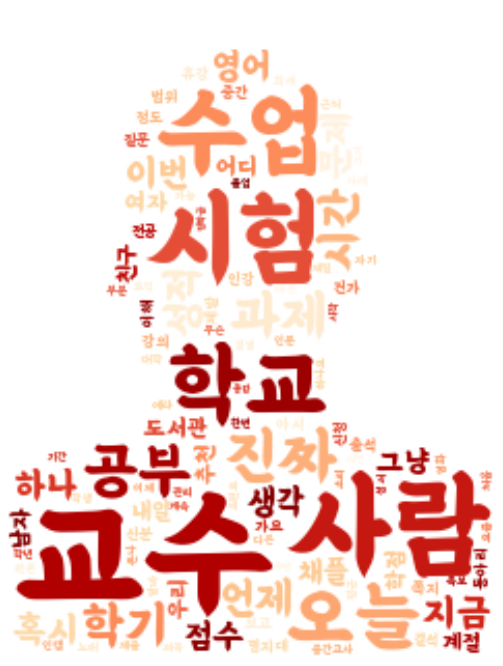

In [283]:
wordcloud = WordCloud(font_path="C:/Users/Kim/Downloads/BMEULJIROTTF.ttf",
                     background_color='white',width=800, height=600,
                     max_words=100, mask=custom_mask, # word의 최대 갯수와 마스크, font-size설정
                     max_font_size=70, colormap='OrRd')
print(dict(tags))

cloud = wordcloud.generate_from_frequencies(dict(tags))
plt.figure(figsize=(12,12))
plt.axis('off')
plt.imshow(cloud, interpolation='bilinear') # 마스크용 이미지의 색으로 워드클라우드 생성
plt.show()

In [109]:
df = pd.concat([seoul, yongin], axis=0)
df

,recommend,comment,date,title,content
0,0,1,8분 전,학년 마치고 바로 코로나 터져서,아직도 내가 학년 같아 후배 님들 잘 살아있나요 보고싶다 ...
1,0,8,11/25 19:07,마스크 의무화 아닌가,어르신들 너무 대놓고 안쓰고 당당하게 다니셔서 코로나 끝난 줄
2,0,8,11/25 18:05,코로나때문에 비대면 시험 보는건데,과제를 학교에 와서 내고 가라고 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 엄청나...
3,0,1,11/25 17:36,대면시험 개로 이동할뻔했는데 됨,케텍타고 가는길에 코로나 걸릴까봐 모자라도 살라했드만 다 비대면때리네 모든 시험...
4,6,1,11/25 15:40,살만해지나 싶으면 또 코로나 터지고,짜증나죽겠네
...,...,...,...,...,...
664,0,9,01/27 10:37,코로나 때문에 글올립니다,혹시 중국인 유학생 계속 받을려나 이번에 기숙사 들어가는데 이러면 솔직히 걱정이 ...
665,2,1,01/26 15:26,충남도 여행사 관광객에 양해 구하고 취소요청,홍성 연합뉴스 양영석 기자 우한 폐렴 으로 불리는 신종 코로나바이러스 확산...
666,0,6,01/26 10:27,코로나 예방수칙,감염루트가 비말감염 인지라 마스크만 잘 쓰고 손만 잘 씻으면 예방하는게 그다지 어렵...
667,0,5,01/26 10:00,코로나때문에,알바하는데 손님없다 ㅋㅋㅋㅋㅋㅋ


In [115]:
df = df.sort_values('date')
df = df.reset_index()
del df['index']

In [119]:
df.to_csv('../data/코로나_이후_명지.csv')